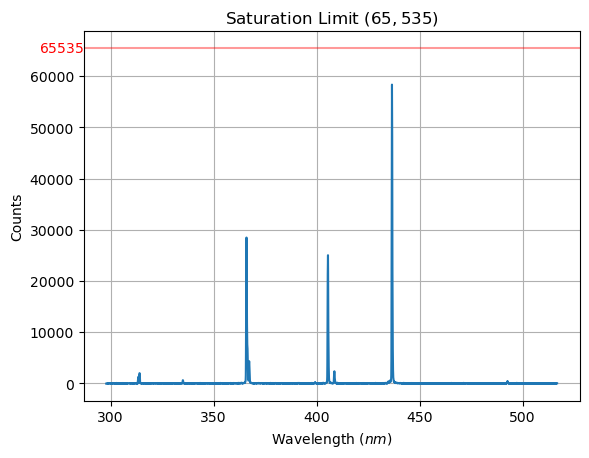

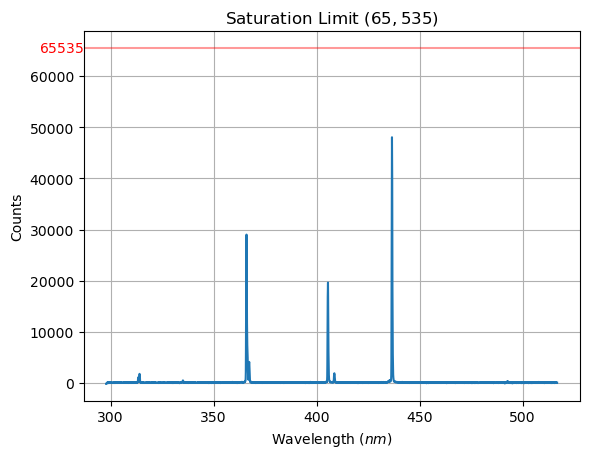

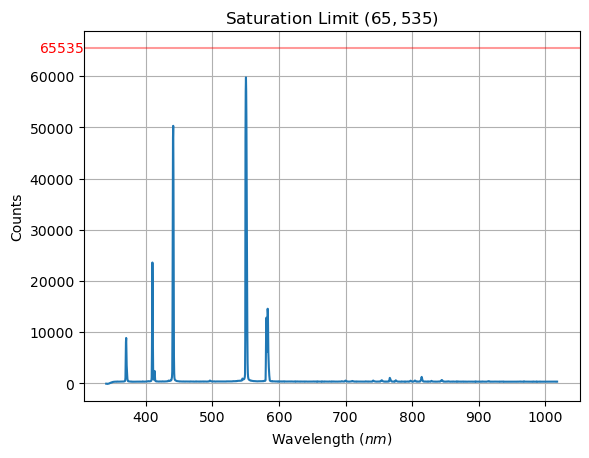

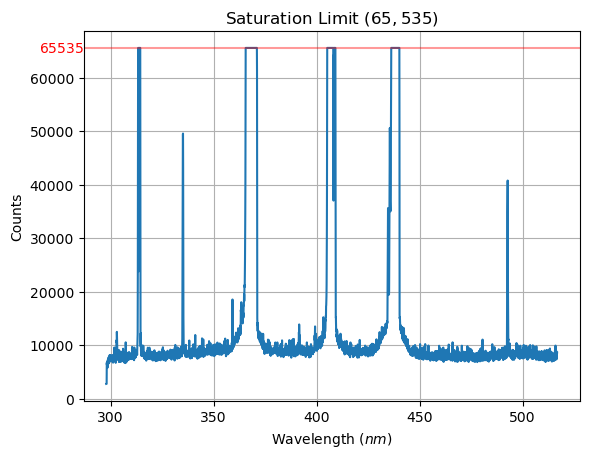

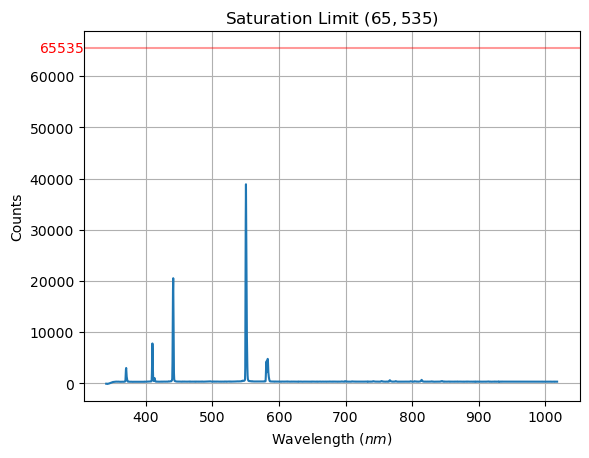

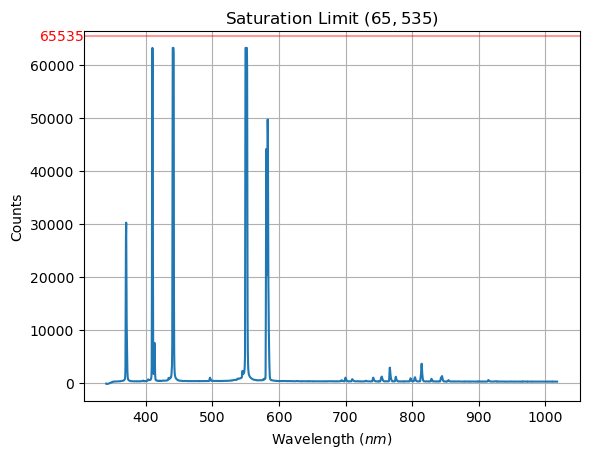

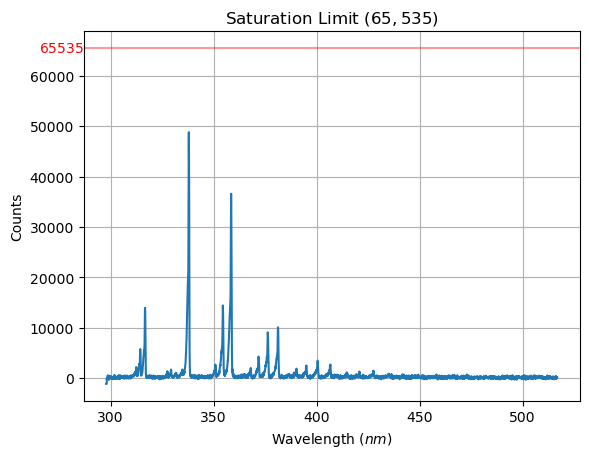

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define file paths and names
file_paths = {
    'MercTEDark': '/home/dj-lawton/Documents/Junior Sophister/JS Labs/Molecular Spectroscopy/Exp1/MercuryDarkClose1_FLMT016052_11-57-24-770.txt',
    'MercTNoEDark': '/home/dj-lawton/Documents/Junior Sophister/JS Labs/Molecular Spectroscopy/Exp1/MercuryNoDarkClose1_FLMT016052_11-33-03-669.txt',
    'MercSSpec': '/home/dj-lawton/Documents/Junior Sophister/JS Labs/Molecular Spectroscopy/Exp1/MercuryS_FLMS043641_12-39-11-815.txt',
    'MercTSaturated': '/home/dj-lawton/Documents/Junior Sophister/JS Labs/Molecular Spectroscopy/Exp1/MercurySATURATED_FLMT016052_11-30-39-931.txt',
    'MercS_big': '/home/dj-lawton/Documents/Junior Sophister/JS Labs/Molecular Spectroscopy/Exp1/MercurySBigPeaks_FLMS043641_12-36-23-480.txt',
    'MercS_small': '/home/dj-lawton/Documents/Junior Sophister/JS Labs/Molecular Spectroscopy/Exp1/MercurySSmallPeaks_FLMS043641_12-37-59-611.txt',
    'N2_Big': '/home/dj-lawton/Documents/Junior Sophister/JS Labs/Molecular Spectroscopy/Exp2/N2TBigPeaks_FLMT016052_12-53-00-515.txt',
}

# Load the data into a dictionary
data_frames = {name: pd.read_csv(path, delim_whitespace=True, names=['Wavelength', 'Counts']) for name, path in file_paths.items()}

sorted_data_frames = {name: df.sort_values(by='Counts') for name, df in data_frames.items()}

# Print the data frames
# for name, df in sorted_data_frames.items():
#     print(f"{name}:(Sorted by Count)\n{df}\n")


# Example usage of one of the data frames
for name, df in data_frames.items():
    plt.plot(df['Wavelength'], df['Counts'], label=name)
    plt.xlabel('Wavelength $(nm)$')
    plt.ylabel('Counts')
    plt.title('Saturation Limit $(65,535)$')
    plt.axhline(y=65535, color='red', alpha=0.4)
    plt.text(plt.xlim()[0], 65535, '$65535$', va='center', ha='right', color='red')
    plt.grid()
    # plt.xlim(434, 440)
    # plt.ylim(0, )
    plt.show()
    plt.close()

     Wavelength     Counts
216     313.053   440.7521
217     313.122   674.2206
218     313.192   721.0313
219     313.262   766.3792
220     313.331   849.1756
221     313.401  1139.6946
222     313.471  1207.2776
223     313.541  1386.3286
224     313.610  1927.8700
225     313.680  2100.1920
226     313.750  2280.9983
[3.42481353e+05 1.49032574e+00 3.18452062e+02] [[3.38725123e+13 1.32909304e+07 8.85902301e+07]
 [1.32909304e+07 5.22308044e+00 3.47872228e+01]
 [8.85902301e+07 3.47872228e+01 2.31784607e+02]]


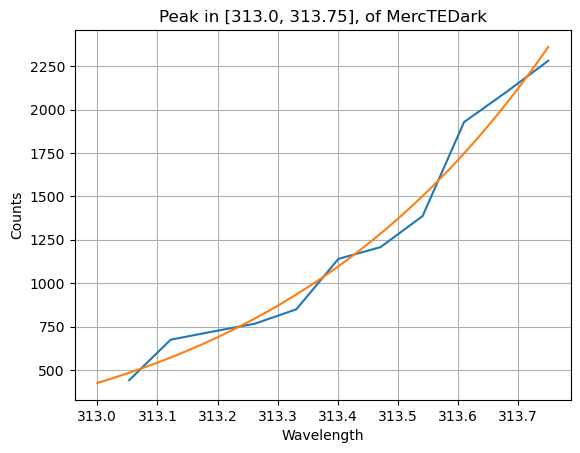

In [3]:
import numpy as np
from scipy.optimize import curve_fit

def gaussian(x, a, b, c):
    return a * np.exp(-(x - c)**2/(2*b**2))


def fit_gaussian(df_, q):
    params, covar = curve_fit(gaussian, df_['Wavelength'], df_['Counts'], p0=q, maxfev=1000000)
    return params, covar

def fitpeakfunc(df, ranges, name):
    df_is = (df['Wavelength']>=ranges[0]) & (df['Wavelength']<=ranges[1])
    df = df[df_is]
    mean = sum(df['Counts']*df['Wavelength'])/sum(df['Counts'])
    sig = np.sqrt(sum(df['Counts']*(df['Wavelength']-mean)**2)/sum(df['Counts']))
    q = [max(df['Counts']),sig, mean]
    print(df)
    params, covar = fit_gaussian(df, q)
    print(params, covar)
    plt.figure()
    plt.plot(df['Wavelength'], df['Counts'], label='Data')
    plt.plot(np.linspace(ranges[0], ranges[1], 10*len(df)), gaussian(np.linspace(ranges[0], ranges[1], 10*len(df)), *params), label='Fit')
    # plt.fill_between(df['Wavelength'], gaussian(df['Wavelength'], *params-(np.diag(covar))^2), gaussian(df['Wavelength'], *params+(np.diag(covar))^2), alpha=0.5)
    plt.xlabel('Wavelength')
    plt.ylabel('Counts')
    plt.title(f'Peak in {ranges}, of {name}')
    plt.grid()
    # plt.savefig(f'Peak in {ranges}, of {name}.png')
    plt.show()

    return params, covar

q = fitpeakfunc(data_frames['N2_Big'], [313., 313.75], 'MercTEDark')

Identified peaks at indices: [  80  186  195  271  575  662  668 1214 1364]
    Wavelength     Counts
76     368.825   562.5694
77     369.200  1087.4562
78     369.574  4378.0414
79     369.948  8068.8755
80     370.321  8862.2131
81     370.695  5695.5376
82     371.069  3481.6682
83     371.443  2332.3785
84     371.817  1574.1143
[8.57613363e+03 6.08238336e-01 3.70262413e+02] [[ 3.99576759e+05 -1.90153530e+01  4.15108402e-02]
 [-1.90153530e+01  2.70294996e-03 -5.44654266e-06]
 [ 4.15108402e-02 -5.44654266e-06  2.67969008e-03]]


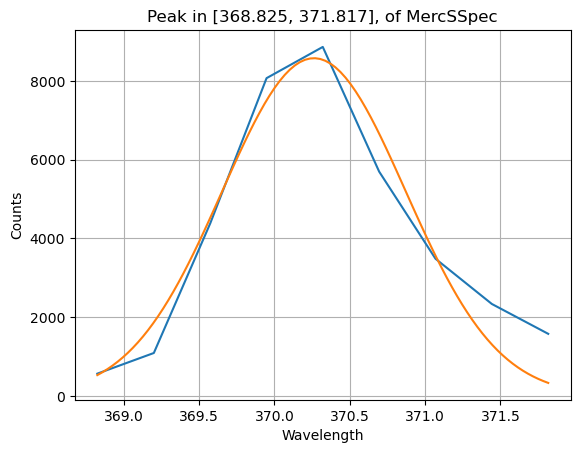

     Wavelength      Counts
182     408.250    593.7592
183     408.619   1094.0097
184     408.989   5641.7747
185     409.359  16947.6544
186     409.728  23601.5200
187     410.098  18600.7141
188     410.467   7747.5113
189     410.837   2560.0520
190     411.206   1154.4476
[2.38150817e+04 4.73930132e-01 4.09766115e+02] [[ 2.42395754e+05 -3.21781747e+00  4.30397390e-03]
 [-3.21781747e+00  1.28063760e-04 -1.41626292e-07]
 [ 4.30397390e-03 -1.41626292e-07  1.27942708e-04]]


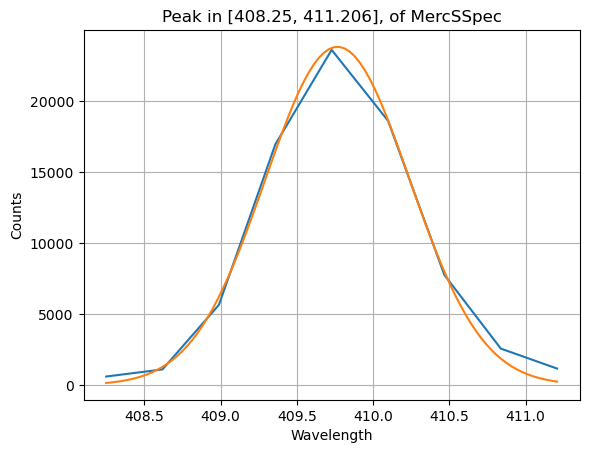

     Wavelength     Counts
191     411.576   729.9264
192     411.945   761.8444
193     412.314  1489.6470
194     412.683  2407.5010
195     413.053  2416.1177
196     413.422  1607.0032
197     413.791   770.9465
198     414.160   502.2530
199     414.529   424.8246
[2.36993473e+03 6.75965804e-01 4.12875626e+02] [[ 2.87971673e+04 -5.66696396e+00  8.99796611e-02]
 [-5.66696396e+00  3.25981284e-03 -6.24927936e-05]
 [ 8.99796611e-02 -6.24927936e-05  3.10948477e-03]]


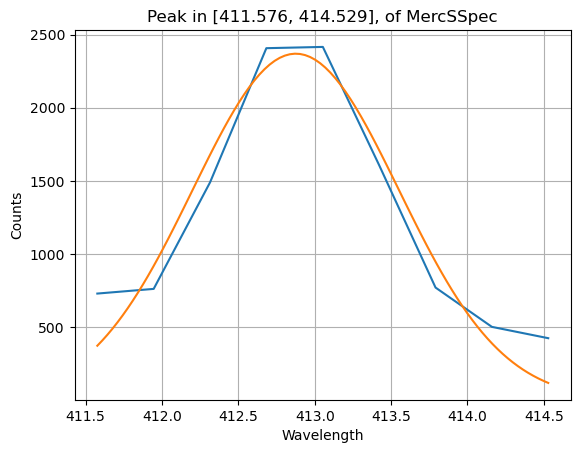

     Wavelength      Counts
267     439.527   2261.5036
268     439.893  11758.9815
269     440.260  32055.5350
270     440.626  48025.8077
271     440.992  50312.0083
272     441.358  40418.8933
273     441.724  18683.8465
274     442.090   5209.4864
275     442.455   2015.7474
[5.30386991e+04 5.87809486e-01 4.40883900e+02] [[ 1.44984774e+06 -1.07827647e+01  2.89098680e-02]
 [-1.07827647e+01  2.39391809e-04 -8.17705614e-07]
 [ 2.89098680e-02 -8.17705614e-07  2.37234227e-04]]


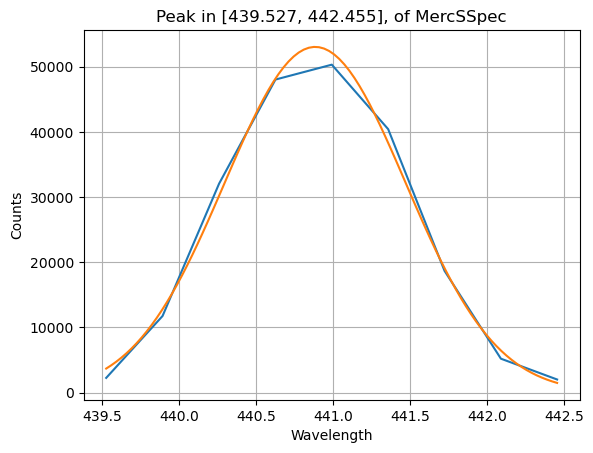

     Wavelength      Counts
571     548.872   1762.7095
572     549.225   8463.0564
573     549.578  47980.9041
574     549.931  57108.3519
575     550.284  59779.3886
576     550.637  57056.6521
577     550.990  51168.6964
578     551.343  41556.2896
579     551.695  28589.4617
[6.35569519e+04 8.54987491e-01 5.50500824e+02] [[ 3.09220732e+07 -3.39070463e+02 -2.78350707e+01]
 [-3.39070463e+02  9.96088065e-03  1.10782992e-03]
 [-2.78350707e+01  1.10782992e-03  7.74961478e-03]]


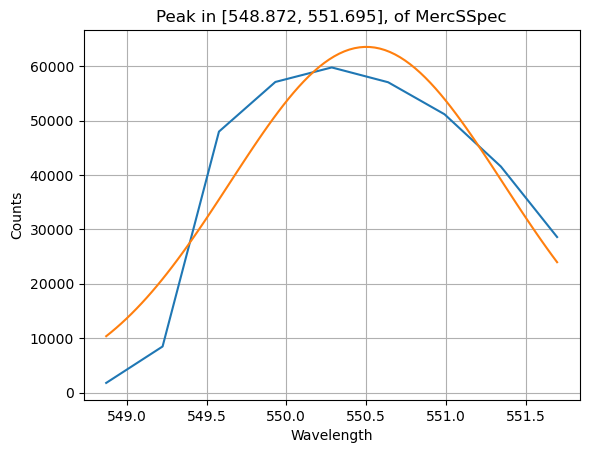

     Wavelength      Counts
658     579.421    510.3842
659     579.770    695.2171
660     580.119   3712.3757
661     580.468   9142.9213
662     580.817  12820.7698
663     581.166  12771.0118
664     581.515   8329.1951
665     581.864   6182.3170
666     582.213   7762.4387
[1.23209062e+04 7.39245569e-01 5.81127765e+02] [[ 1.92669303e+06 -8.79380986e+01 -6.92864684e+00]
 [-8.79380986e+01  1.11653430e-02  1.15432673e-03]
 [-6.92864684e+00  1.15432673e-03  9.49227470e-03]]


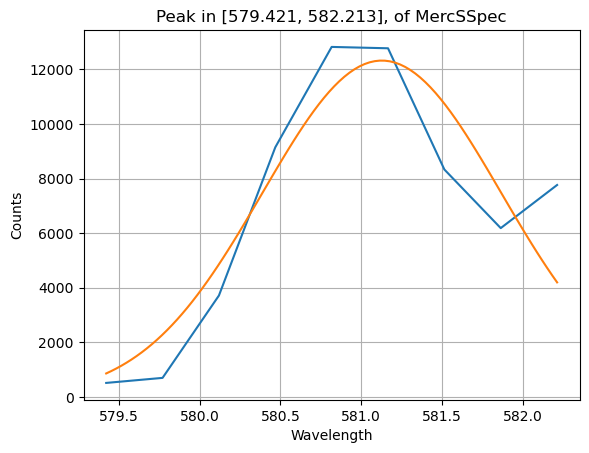

     Wavelength      Counts
664     581.515   8329.1951
665     581.864   6182.3170
666     582.213   7762.4387
667     582.561  12005.5872
668     582.910  14571.6466
669     583.259  13694.5698
670     583.608   8693.3998
671     583.956   5983.8916
672     584.305   4342.1185
[1.30535693e+04 9.58856824e-01 5.82873717e+02] [[ 1.61094222e+06 -1.07480910e+02  1.98862328e+00]
 [-1.07480910e+02  1.80742035e-02 -4.64922967e-04]
 [ 1.98862328e+00 -4.64922967e-04  1.20123718e-02]]


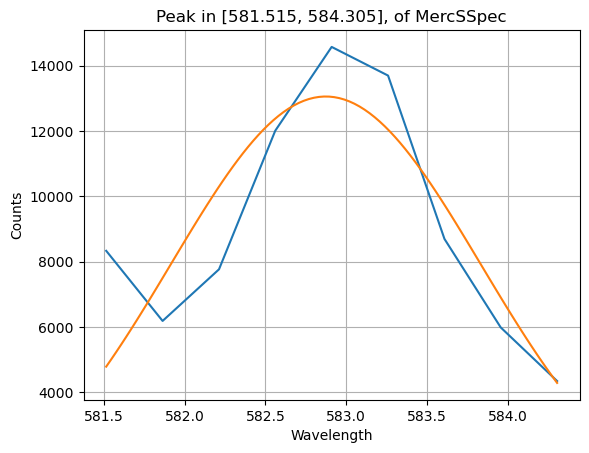

      Wavelength     Counts
1210     765.121   351.6438
1211     765.444   431.8635
1212     765.768   682.1101
1213     766.091   896.3125
1214     766.414  1064.5190
1215     766.737   990.9742
1216     767.060   867.0645
1217     767.383   725.0720
1218     767.706   638.0560
[1.01461339e+03 9.94798772e-01 7.66633253e+02] [[ 1.17446987e+03 -1.22341827e+00 -1.63742461e-01]
 [-1.22341827e+00  3.12741369e-03  6.20097318e-04]
 [-1.63742461e-01  6.20097318e-04  1.82712051e-03]]


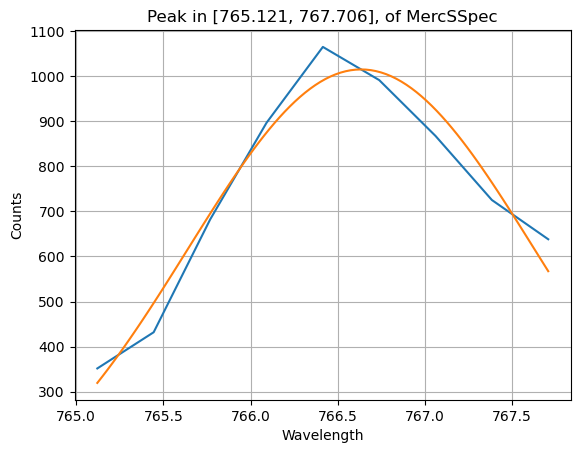

      Wavelength     Counts
1360     813.057   587.9339
1361     813.373   764.0289
1362     813.688  1008.6929
1363     814.004  1181.8752
1364     814.320  1255.4200
1365     814.635  1077.9901
1366     814.951   935.0267
1367     815.266   741.8198
1368     815.582   596.5505
[1.19770769e+03 1.02350002e+00 8.14288122e+02] [[ 7.24988781e+02 -6.99288103e-01  1.43038893e-02]
 [-6.99288103e-01  1.56997785e-03 -4.75024011e-05]
 [ 1.43038893e-02 -4.75024011e-05  7.94326223e-04]]


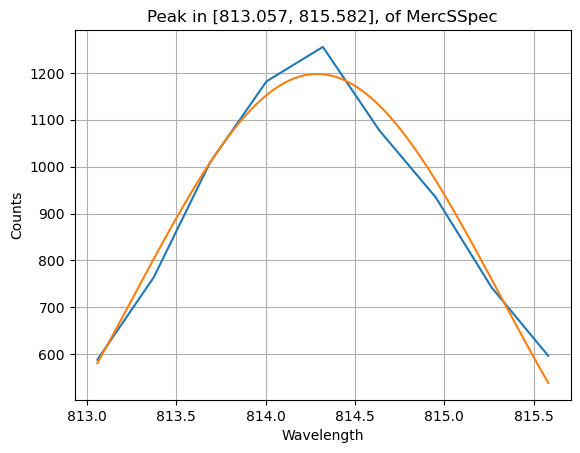

In [37]:
from scipy.signal import find_peaks

def identify_and_fit_peaks(df, name, width, height=None, distance=None, prominence=None):
    # Identify peaks
    peaks, properties = find_peaks(df['Counts'], height=height, distance=distance, prominence=prominence)
    print(f"Identified peaks at indices: {peaks}")
    sigma_list = []
    mean_list = []
    mean_error_list = []
    # Fit Gaussian to each identified peak
    for peak in peaks:
        peak_height = properties['peak_heights'][np.where(peaks == peak)][0]
        peak_range = [df['Wavelength'].iloc[max(0, peak-width)], df['Wavelength'].iloc[min(len(df)-1, peak+width)]]
        params, covar = fitpeakfunc(df, peak_range, name)
        sigma_list.append(params[1])
        mean_list.append(params[2])
        mean_error_list.append(np.sqrt(covar[2,2]))

    
    data = {'sigma': sigma_list, 'mean': mean_list, 'meanErr': mean_error_list, 'tomeanErr':np.sqrt(np.array(sigma_list)**2 + np.array(mean_error_list)**2)}
    # Create a DataFrame from the dictionary
    df = pd.DataFrame(data)
    # Save the DataFrame to a CSV file
    df.to_csv(f'output{name}.csv', index=False)

# identify_and_fit_peaks(data_frames['MercTEDark'], 'MercTEDark', width=8, height=600, distance=10, prominence=600)
identify_and_fit_peaks(data_frames['MercSSpec'], 'MercSSpec', width=4, height=500, distance=5, prominence=500)

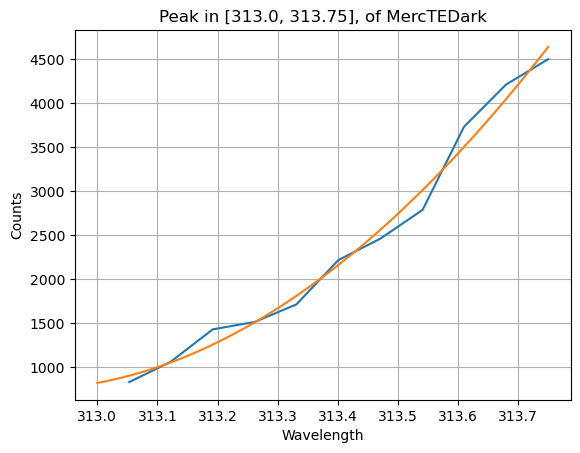

Identified peaks at indices: [ 207  235  268  426  452  533  579  771  826  887 1033 1092 1161 1239
 1381 1458 1547 1647 1780 1880 1994]
     Wavelength     Counts  Corrected Wavelength
202     312.076   867.3148               311.229
203     312.146   994.5814               311.299
204     312.215   940.7491               311.368
205     312.285  1289.4889               311.438
206     312.355  1979.3618               311.508
207     312.425  2213.1228               311.578
208     312.495  2119.7939               311.648
209     312.564  1625.6483               311.717
210     312.634  1302.9470               311.787
211     312.704   753.2136               311.857
212     312.774   498.9730               311.927
[2.06165532e+03 2.08715113e-01 3.12431365e+02] [[ 1.61621164e+04 -1.31652341e+00 -1.67612124e-02]
 [-1.31652341e+00  2.86162004e-04  4.50745840e-06]
 [-1.67612124e-02  4.50745840e-06  2.22422054e-04]]


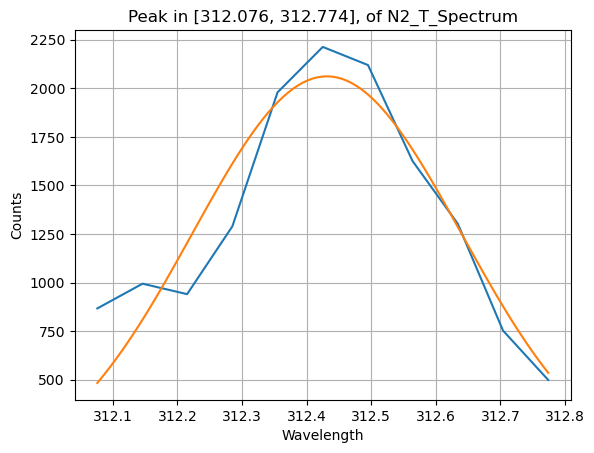

     Wavelength     Counts  Corrected Wavelength
230     314.028  2862.0363               313.181
231     314.098  2646.9996               313.251
232     314.168  3219.8457               313.321
233     314.237  4725.3953               313.390
234     314.307  5489.5802               313.460
235     314.376  5772.1999               313.529
236     314.446  5280.3949               313.599
237     314.516  4588.4740               313.669
238     314.585  2993.6915               313.738
239     314.655  1677.1401               313.808
240     314.724   770.7677               313.877
[5.66231208e+03 2.10992174e-01 3.14350834e+02] [[ 8.39605149e+04 -2.56119794e+00  1.11880603e-01]
 [-2.56119794e+00  2.07408445e-04 -1.21533687e-05]
 [ 1.11880603e-01 -1.21533687e-05  1.58448125e-04]]


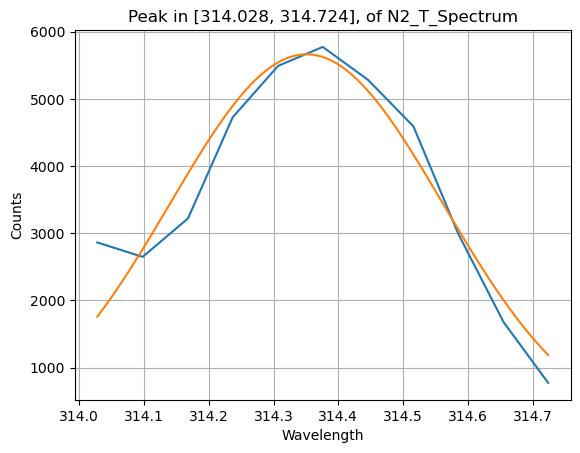

     Wavelength      Counts  Corrected Wavelength
263     316.323   5742.9432               315.476
264     316.393   6015.9082               315.546
265     316.462   6827.7815               315.615
266     316.532   8852.6375               315.685
267     316.601  12191.9968               315.754
268     316.671  13977.5330               315.824
269     316.740  13943.5952               315.893
270     316.809  12759.5767               315.962
271     316.879   9727.9978               316.032
272     316.948   5045.7561               316.101
273     317.018   2046.0671               316.171
[1.38321831e+04 2.06580163e-01 3.16685106e+02] [[ 7.27503634e+05 -8.71283407e+00 -2.08434597e-01]
 [-8.71283407e+00  2.79603358e-04  8.73104670e-06]
 [-2.08434597e-01  8.73104670e-06  2.18756043e-04]]


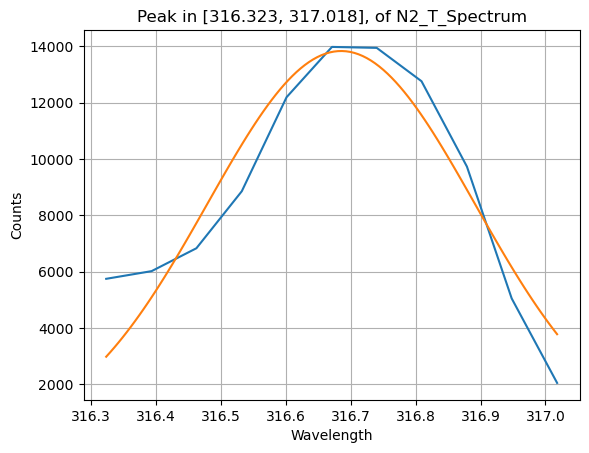

     Wavelength     Counts  Corrected Wavelength
421     327.221   477.9081               326.374
422     327.289   372.8766               326.442
423     327.358   690.6043               326.511
424     327.426   741.8035               326.579
425     327.495   822.8446               326.648
426     327.563  1385.1583               326.716
427     327.632  1211.9586               326.785
428     327.700  1022.0827               326.853
429     327.769   891.8904               326.922
430     327.837   863.8040               326.990
431     327.905   200.2621               327.058
[1.18937805e+03 2.16903905e-01 3.27602965e+02] [[ 1.00826970e+04 -1.58351945e+00 -1.17358419e-01]
 [-1.58351945e+00  6.47742014e-04  6.63509760e-05]
 [-1.17358419e-01  6.63509760e-05  4.68277009e-04]]


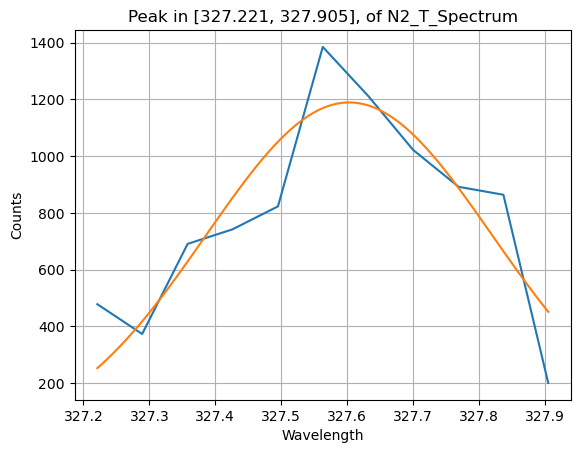

     Wavelength     Counts  Corrected Wavelength
447     329.000   646.7193               328.153
448     329.068   889.5499               328.221
449     329.136  1255.5511               328.289
450     329.205  1474.9764               328.358
451     329.273  1517.3986               328.426
452     329.341  1718.6846               328.494
453     329.410  1255.5511               328.563
454     329.478  1013.3057               328.631
455     329.546   830.1588               328.699
456     329.614   719.2759               328.767
457     329.683   218.4012               328.836
[1.58561945e+03 2.18348872e-01 3.29292951e+02] [[ 3.75640841e+03 -4.52166168e-01  4.12986815e-02]
 [-4.52166168e-01  1.41526554e-04 -1.81968834e-05]
 [ 4.12986815e-02 -1.81968834e-05  1.01302019e-04]]


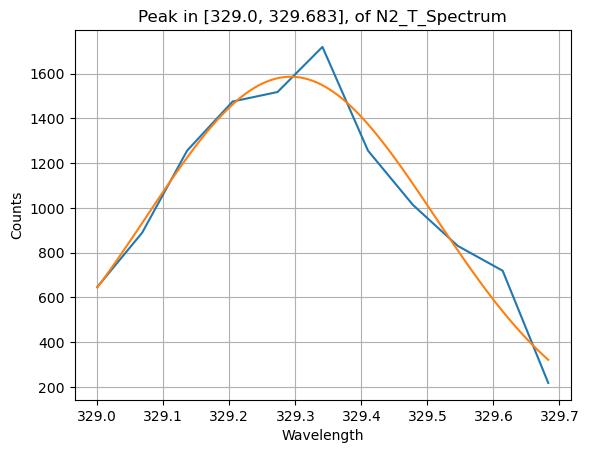

     Wavelength     Counts  Corrected Wavelength
528     334.515  1226.2944               333.668
529     334.583  1297.3882               333.736
530     334.651  1583.5187               333.804
531     334.718  1613.6531               333.871
532     334.786  1584.9815               333.939
533     334.854  1711.6630               334.007
534     334.922  1064.5049               334.075
535     334.990   594.3498               334.143
536     335.058   989.9003               334.211
537     335.125   667.7841               334.278
538     335.193   879.6026               334.346
[1.53907862e+03 3.27323830e-01 3.34717099e+02] [[ 1.49446311e+04 -4.50716940e+00  1.22963003e+00]
 [-4.50716940e+00  4.48504393e-03 -2.45331202e-03]
 [ 1.22963003e+00 -2.45331202e-03  2.87334183e-03]]


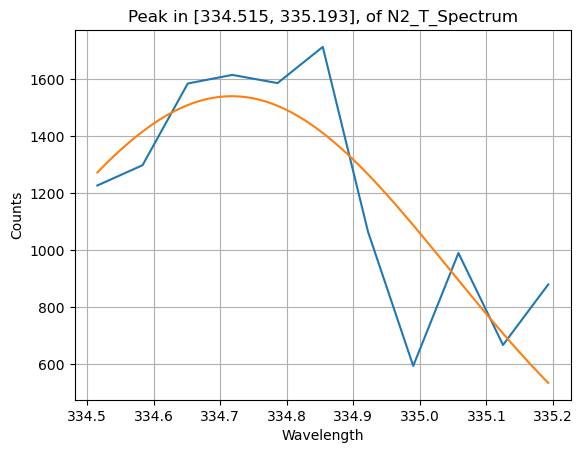

     Wavelength      Counts  Corrected Wavelength
574     337.629  20032.2063               336.782
575     337.697  21355.1941               336.850
576     337.765  27247.4928               336.918
577     337.832  38359.4787               336.985
578     337.900  47747.3674               337.053
579     337.967  48809.9706               337.120
580     338.035  44913.5638               337.188
581     338.102  38315.5936               337.255
582     338.170  25439.1364               337.323
583     338.237  12553.3170               337.390
584     338.305   6109.5296               337.458
[4.86368549e+04 1.93820002e-01 3.37947257e+02] [[ 4.13628010e+06 -1.28471428e+01  3.73240490e-01]
 [-1.28471428e+01  1.08537833e-04 -4.23928324e-06]
 [ 3.73240490e-01 -4.23928324e-06  8.81835807e-05]]


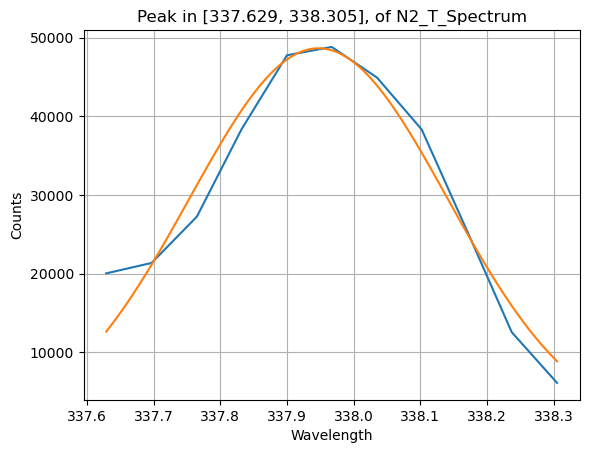

     Wavelength     Counts  Corrected Wavelength
766     350.491  1396.5684               349.644
767     350.557  1345.3692               349.710
768     350.623  1478.4872               349.776
769     350.690  2377.5454               349.843
770     350.756  2558.0593               349.909
771     350.823  2707.8535               349.976
772     350.889  2632.6638               350.042
773     350.955  2544.8937               350.108
774     351.022  1858.8242               350.175
775     351.088  1670.4111               350.241
776     351.154  1257.8917               350.307
[2.66636771e+03 2.54996166e-01 3.50838723e+02] [[ 1.18943442e+04 -1.22724492e+00 -5.03565559e-02]
 [-1.22724492e+00  3.00258849e-04  1.78432711e-05]
 [-5.03565559e-02  1.78432711e-05  1.61668472e-04]]


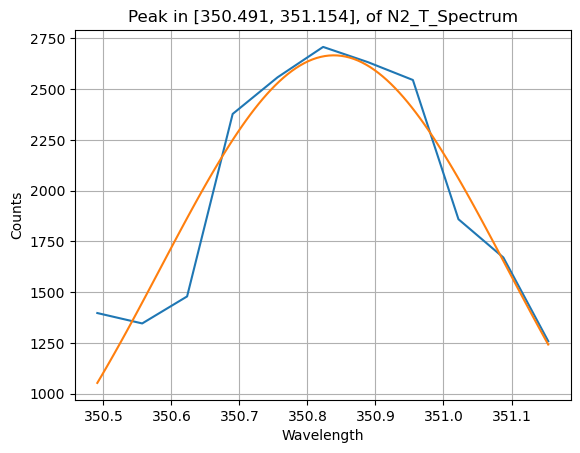

     Wavelength      Counts  Corrected Wavelength
821     354.134   6330.4177               353.287
822     354.200   7233.2793               353.353
823     354.266   8814.3112               353.419
824     354.332  11368.7134               353.485
825     354.398  13616.2128               353.551
826     354.464  14430.4267               353.617
827     354.530  13711.5896               353.683
828     354.596  12514.9907               353.749
829     354.662   9292.9508               353.815
830     354.728   5832.4687               353.881
831     354.794   3487.2519               353.947
[1.42573201e+04 2.17010942e-01 3.54456333e+02] [[ 2.13702866e+05 -2.88146827e+00  4.57482249e-02]
 [-2.88146827e+00  9.91389268e-05 -2.19658177e-06]
 [ 4.57482249e-02 -2.19658177e-06  6.80898068e-05]]


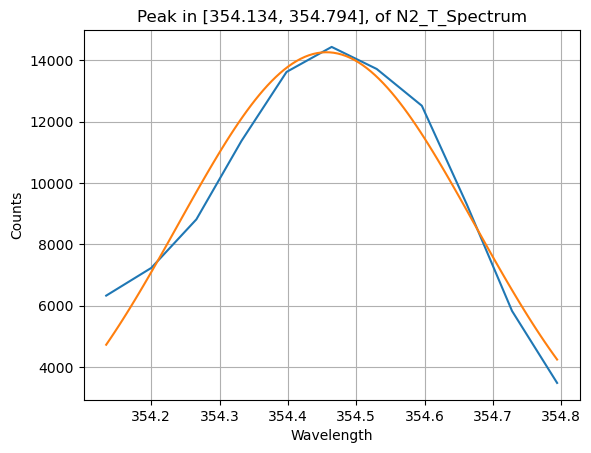

     Wavelength      Counts  Corrected Wavelength
882     358.153  15695.7788               357.306
883     358.219  17459.0799               357.372
884     358.284  21352.5610               357.437
885     358.350  28405.1803               357.503
886     358.416  33172.2664               357.569
887     358.481  36596.4701               357.634
888     358.547  33839.6116               357.700
889     358.613  29968.9507               357.766
890     358.678  22316.5692               357.831
891     358.744  14227.9703               357.897
892     358.810   8235.9063               357.963
[3.52813429e+04 2.12481195e-01 3.58472352e+02] [[ 1.35374911e+06 -7.09798572e+00  1.27992984e-01]
 [-7.09798572e+00  9.57109289e-05 -2.38768334e-06]
 [ 1.27992984e-01 -2.38768334e-06  6.72313306e-05]]


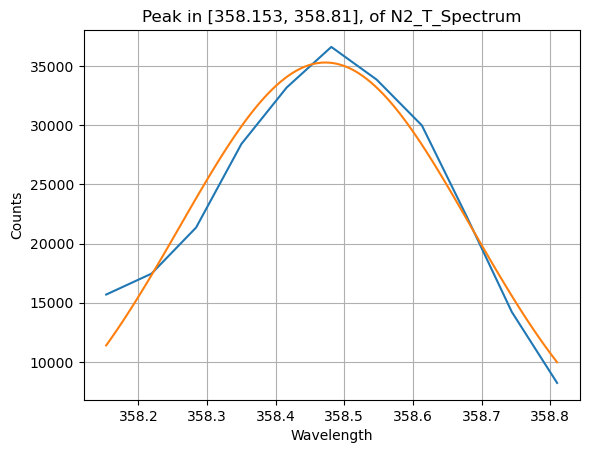

      Wavelength     Counts  Corrected Wavelength
1028     367.681   947.7707               366.834
1029     367.746  1120.0926               366.899
1030     367.810  1546.0701               366.963
1031     367.875  1559.5282               367.028
1032     367.940  1270.1795               367.093
1033     368.005  2020.9063               367.158
1034     368.070  1147.8865               367.223
1035     368.134  1041.9772               367.287
1036     368.199   974.3943               367.352
1037     368.264   498.6804               367.417
1038     368.329   522.3783               367.482
[1.60317961e+03 2.41731657e-01 3.67931251e+02] [[ 1.55054841e+04 -2.48127944e+00  4.39516429e-01]
 [-2.48127944e+00  1.00423481e-03 -2.70055024e-04]
 [ 4.39516429e-01 -2.70055024e-04  6.19925722e-04]]


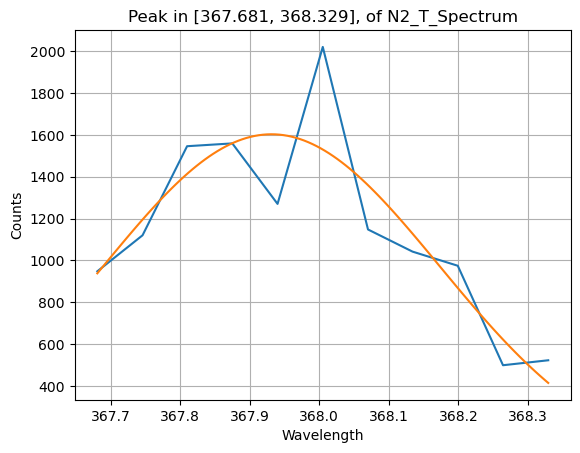

      Wavelength     Counts  Corrected Wavelength
1087     371.495  2119.5014               370.648
1088     371.559  2170.7006               370.712
1089     371.623  3172.4499               370.776
1090     371.688  3700.5332               370.841
1091     371.752  4255.8253               370.905
1092     371.817  4293.5665               370.970
1093     371.881  3876.0734               371.034
1094     371.946  3872.8552               371.099
1095     372.010  3040.2096               371.163
1096     372.074  1729.8022               371.227
1097     372.139  1137.3541               371.292
[4.33541457e+03 2.22918222e-01 3.71799423e+02] [[ 2.22897979e+04 -1.07979004e+00  4.24623635e-02]
 [-1.07979004e+00  1.30156365e-04 -7.30605619e-06]
 [ 4.24623635e-02 -7.30605619e-06  8.29152717e-05]]


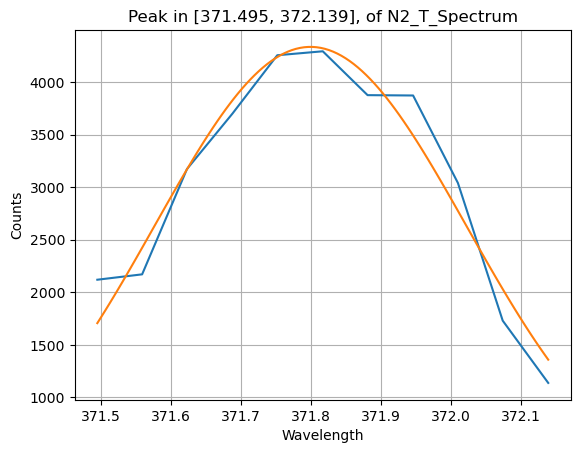

      Wavelength     Counts  Corrected Wavelength
1156     375.928  4398.3055               375.081
1157     375.992  4541.9558               375.145
1158     376.056  5329.5461               375.209
1159     376.120  6793.2586               375.273
1160     376.184  8329.2352               375.337
1161     376.248  9082.3026               375.401
1162     376.312  8766.0377               375.465
1163     376.376  8440.4106               375.529
1164     376.440  7031.9933               375.593
1165     376.504  5153.7134               375.657
1166     376.568  3447.1703               375.721
[8.87354465e+03 2.37698860e-01 3.76266067e+02] [[ 9.37237343e+04 -2.58760678e+00 -1.16918867e-01]
 [-2.58760678e+00  1.72278242e-04  1.13322765e-05]
 [-1.16918867e-01  1.13322765e-05  9.83484915e-05]]


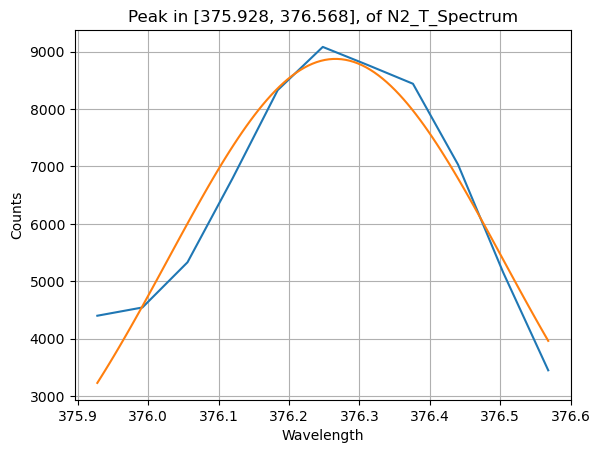

      Wavelength      Counts  Corrected Wavelength
1234     380.905   5004.7968               380.058
1235     380.969   5039.3197               380.122
1236     381.032   6874.2997               380.185
1237     381.096   8247.3164               380.249
1238     381.159   9725.9499               380.312
1239     381.223  10094.2917               380.376
1240     381.286   9934.8427               380.439
1241     381.350   9319.5744               380.503
1242     381.413   6818.1268               380.566
1243     381.477   4605.1503               380.630
1244     381.540   3245.2991               380.693
[1.01463308e+04 2.22422200e-01 3.81217429e+02] [[ 1.07965470e+05 -2.25838570e+00  2.85926727e-02]
 [-2.25838570e+00  1.16857824e-04 -2.11690930e-06]
 [ 2.85926727e-02 -2.11690930e-06  7.29850320e-05]]


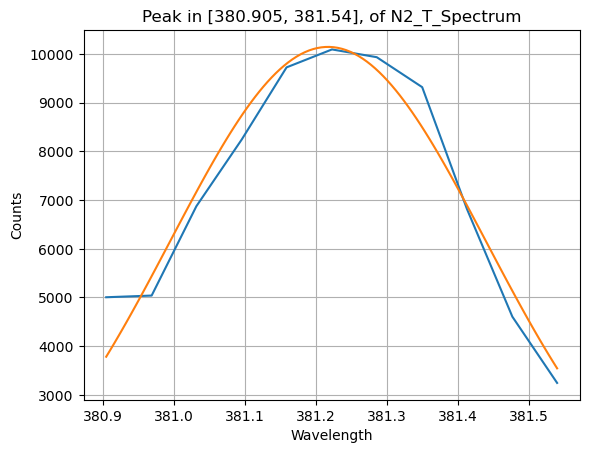

      Wavelength     Counts  Corrected Wavelength
1376     389.871  1003.3584               389.024
1377     389.934   810.5568               389.087
1378     389.996  1279.5416               389.149
1379     390.059  1376.0887               389.212
1380     390.122  1651.6868               389.275
1381     390.185  1892.4694               389.338
1382     390.247  1176.2655               389.400
1383     390.310  1290.3666               389.463
1384     390.373  1051.0468               389.526
1385     390.435   674.8057               389.588
1386     390.498   516.5270               389.651
[1.60639300e+03 2.28659777e-01 3.90148733e+02] [[ 1.03950153e+04 -1.49707404e+00  1.32843264e-01]
 [-1.49707404e+00  5.28463941e-04 -6.87302599e-05]
 [ 1.32843264e-01 -6.87302599e-05  3.15315693e-04]]


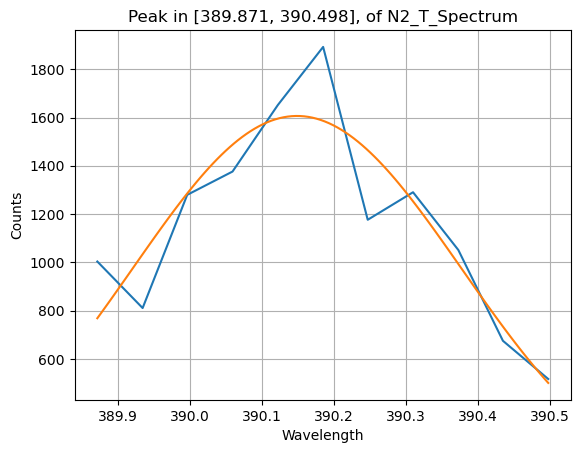

      Wavelength     Counts  Corrected Wavelength
1453     394.682  1319.0382               393.835
1454     394.744  1735.6535               393.897
1455     394.806  2014.4698               393.959
1456     394.869  2338.3415               394.022
1457     394.931  2347.7036               394.084
1458     394.993  2506.8600               394.146
1459     395.055  2231.8471               394.208
1460     395.117  2048.1150               394.270
1461     395.180  1815.2317               394.333
1462     395.242  1352.3908               394.395
1463     395.304   771.9379               394.457
[2.47249420e+03 2.48154814e-01 3.94960653e+02] [[ 2.52109012e+03 -2.88280748e-01  2.49581076e-02]
 [-2.88280748e-01  7.78622791e-05 -1.01063007e-05]
 [ 2.49581076e-02 -1.01063007e-05  4.02833277e-05]]


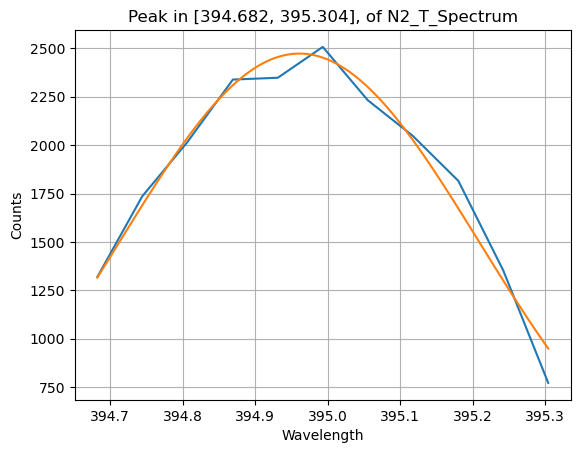

      Wavelength     Counts  Corrected Wavelength
1542     400.198  1969.1220               399.351
1543     400.259  2270.7585               399.412
1544     400.321  2735.3548               399.474
1545     400.383  3444.2446               399.536
1546     400.445  3463.2614               399.598
1547     400.506  3485.4965               399.659
1548     400.568  2936.6409               399.721
1549     400.630  2701.4171               399.783
1550     400.691  1958.2970               399.844
1551     400.753  1649.0537               399.906
1552     400.815  1083.5218               399.968
[3.45608051e+03 2.32221804e-01 4.00458610e+02] [[ 5.13001771e+03 -3.64921341e-01  4.46556648e-02]
 [-3.64921341e-01  6.35936407e-05 -1.16300149e-05]
 [ 4.46556648e-02 -1.16300149e-05  3.69723938e-05]]


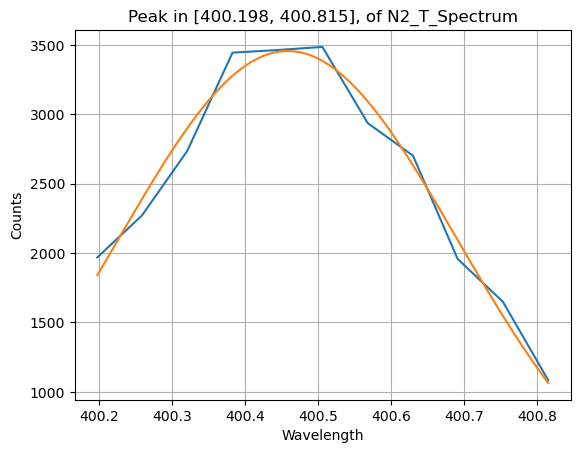

      Wavelength     Counts  Corrected Wavelength
1642     406.338  1509.2067               405.491
1643     406.399  1928.7477               405.552
1644     406.460  2516.8073               405.613
1645     406.521  2439.5696               405.674
1646     406.583  2417.9197               405.736
1647     406.644  2693.8103               405.797
1648     406.705  2369.0610               405.858
1649     406.766  1970.2922               405.919
1650     406.827  1269.8869               405.980
1651     406.888   852.9790               406.041
1652     406.949   962.6916               406.102
[2.63851097e+03 2.29751173e-01 4.06577056e+02] [[ 9.70818504e+03 -9.02775901e-01  1.53696376e-01]
 [-9.02775901e-01  2.10878735e-04 -5.46984599e-05]
 [ 1.53696376e-01 -5.46984599e-05  1.28166381e-04]]


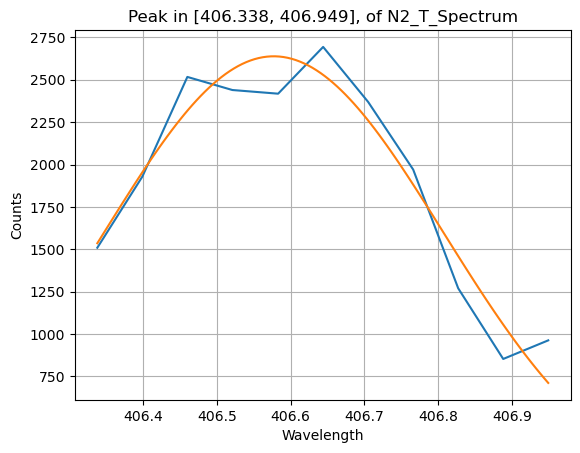

      Wavelength     Counts  Corrected Wavelength
1775     414.411   698.2111               413.564
1776     414.471   610.4410               413.624
1777     414.532  1097.2724               413.685
1778     414.592   921.1471               413.745
1779     414.652   599.0309               413.805
1780     414.712  1120.0926               413.865
1781     414.773   768.7197               413.926
1782     414.833   718.1056               413.986
1783     414.893   867.6073               414.046
1784     414.954   820.7966               414.107
1785     415.014   622.4362               414.167
[8.86004157e+02 4.26186456e-01 4.14693749e+02] [[ 7.80428188e+03 -1.12450857e+01  5.18248135e-01]
 [-1.12450857e+01  3.19701555e-02 -2.35987609e-03]
 [ 5.18248135e-01 -2.35987609e-03  5.37238516e-03]]


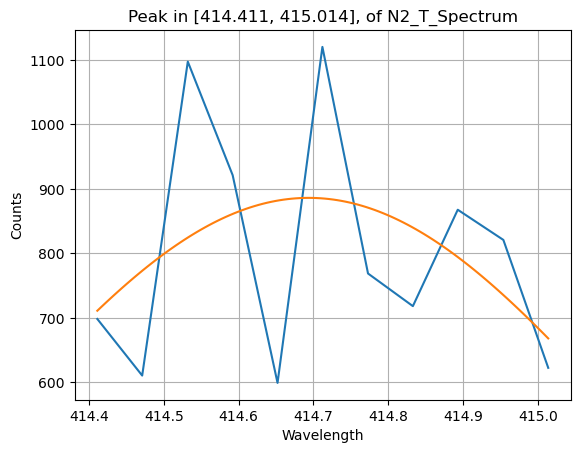

      Wavelength     Counts  Corrected Wavelength
1875     420.410   654.9111               419.563
1876     420.470   629.7504               419.623
1877     420.530  1068.0157               419.683
1878     420.589  1150.5196               419.742
1879     420.649  1169.5364               419.802
1880     420.709  1310.5537               419.862
1881     420.768  1087.3251               419.921
1882     420.828  1143.4980               419.981
1883     420.888   931.3869               420.041
1884     420.947   785.3960               420.100
1885     421.007   439.8744               420.160
[1.25649281e+03 2.34128986e-01 4.20699238e+02] [[ 2.45246356e+03 -5.07463873e-01  1.33704927e-02]
 [-5.07463873e-01  2.46401361e-04 -9.61251285e-06]
 [ 1.33704927e-02 -9.61251285e-06  1.27579956e-04]]


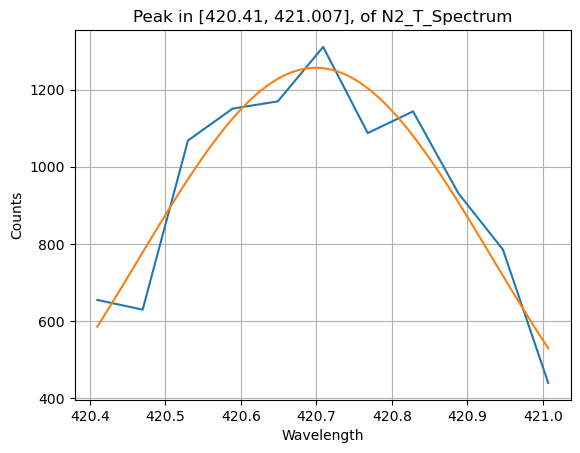

      Wavelength     Counts  Corrected Wavelength
1989     427.176   402.1333               426.329
1990     427.235   767.5494               426.388
1991     427.294   786.8589               426.447
1992     427.353  1106.3420               426.506
1993     427.412  1244.7261               426.565
1994     427.471  1490.4824               426.624
1995     427.530  1072.1116               426.683
1996     427.589  1170.9993               426.742
1997     427.648  1360.5827               426.801
1998     427.707   792.7102               426.860
1999     427.766   496.6324               426.919
[1.34814189e+03 2.15981947e-01 4.27495255e+02] [[ 7.75173347e+03 -1.25827530e+00 -8.15169168e-02]
 [-1.25827530e+00  4.97424505e-04  4.68521102e-05]
 [-8.15169168e-02  4.68521102e-05  2.92399943e-04]]


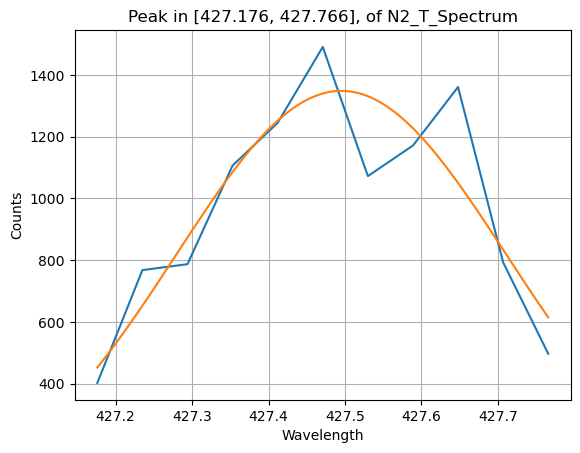

In [14]:
from scipy.special import voigt_profile

# Define file paths and names
file_pathsExp2 = {
    'N2_S_Spectrum': '/home/dj-lawton/Documents/Junior Sophister/JS Labs/Molecular Spectroscopy/Exp2/N2SBigPeaks_FLMS043641_12-47-08-809.txt',
    'N2_S_Spectrum_small': '/home/dj-lawton/Documents/Junior Sophister/JS Labs/Molecular Spectroscopy/Exp2/N2SSmallPeaks_FLMS043641_12-48-40-027.txt',
    'N2_T_Spectrum': '/home/dj-lawton/Documents/Junior Sophister/JS Labs/Molecular Spectroscopy/Exp2/N2TBigPeaks_FLMT016052_12-53-00-515.txt',
    'N2_T_Spectrum_small': '/home/dj-lawton/Documents/Junior Sophister/JS Labs/Molecular Spectroscopy/Exp2/N2TSmallPeaks_FLMT016052_12-54-22-853.txt',
}

# Load the data into a dictionary
data_frames2 = {name: pd.read_csv(path, delim_whitespace=True, names=['Wavelength', 'Counts']) for name, path in file_pathsExp2.items()}
data_frames2['N2_S_Spectrum']['Corrected Wavelengths'] = data_frames2['N2_S_Spectrum']['Wavelength']-4.547
data_frames2['N2_S_Spectrum_small']['Corrected Wavelegths'] = data_frames2['N2_S_Spectrum_small']['Wavelength']-4.547
data_frames2['N2_T_Spectrum']['Corrected Wavelength'] = data_frames2['N2_T_Spectrum']['Wavelength']-0.847
data_frames2['N2_T_Spectrum_small']['Corrected Wavelengths'] = data_frames2['N2_T_Spectrum_small']['Wavelength']-0.847

def voigt(x, a, sigma, gamma):
    return a * voigt_profile(x, sigma, gamma)

def fit_voigt(df_, q):
    params, covar = curve_fit(voigt, df_['Wavelength'], df_['Counts'], p0=q, maxfev=1000000)
    return params, covar

def fitvoigtfunc(df, ranges, name):
    df_is = (df['Wavelength'] >= ranges[0]) & (df['Wavelength'] <= ranges[1])
    df = df[df_is]
    mean = sum(df['Counts'] * df['Wavelength']) / sum(df['Counts'])
    sig = np.sqrt(sum(df['Counts'] * (df['Wavelength'] - mean) ** 2) / sum(df['Counts']))
    q = [max(df['Counts']), sig, sig]
    params, covar = fit_voigt(df, q)
    plt.figure()
    plt.plot(df['Wavelength'], df['Counts'], label='Data')
    plt.plot(np.linspace(ranges[0], ranges[1], 10 * len(df)), voigt(np.linspace(ranges[0], ranges[1], 10 * len(df)), *params), label='Fit')
    plt.xlabel('Wavelength')
    plt.ylabel('Counts')
    plt.title(f'Peak in {ranges}, of {name}')
    plt.grid()
    plt.show()

    return params, covar

fitvoigtfunc(df, [313., 313.75], 'MercTEDark')
# sorted_data_frames = {name: df.sort_values(by='Counts') for name, df in data_frames.items()}

# Print the data frames
# for name, df in data_frames.items():
#     print(f"{name}:(Sorted by Count)\n{df}\n")


# Example usage of one of the data frames
# for name, df in data_frames2.items():
#     plt.plot(df['Wavelength'], df['Counts'], label=name)
#     plt.xlabel('Wavelength (nm)')
#     plt.ylabel('Counts')
#     # plt.xlim([335, 345])
#     plt.show()
#     plt.close()

identify_and_fit_peaks(data_frames2['N2_T_Spectrum'], 'N2_T_Spectrum', height=1000, distance=10, prominence=1000, width=5)
